<a href="https://colab.research.google.com/github/MLopita/E-Commerce-Performance-Analysis/blob/main/Lopita_Mishra_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [544]:
import pandas as pd
import numpy as np

In [545]:
df=pd.read_csv("/content/sales_dataset.csv")

/tmp/ipython-input-1267798104.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/sales_dataset.csv")


In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

In [547]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

**Data cleaning**

In [549]:
df.drop_duplicates(inplace= True)

In [550]:
print(df['Date'].head())
print(df['Date'].dtype)

0    04-30-22
1    04-30-22
2    04-30-22
3    04-30-22
4    04-30-22
Name: Date, dtype: object
object


In [551]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

In [552]:
print("Nulls in Order ID:", df['order_id'].isnull().sum())
print("Duplicate Order IDs:", df['order_id'].duplicated().sum())

Nulls in Order ID: 0
Duplicate Order IDs: 8591


In [553]:
df['order_id'] = df['order_id'].astype(str).str.strip()

In [554]:
print(df['date'].unique()[::20])

['04-30-22' '04-10-2022' '05-22-22' '05-02-2022' '06-11-2022']


In [555]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print("Invalid/Missing Dates:", df['date'].isnull().sum())

Invalid/Missing Dates: 0


/tmp/ipython-input-792588247.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [556]:
print("Earliest Date:", df['date'].min())
print("Latest Date:", df['date'].max())

print(df['date'].dt.year.value_counts())

Earliest Date: 2022-03-31 00:00:00
Latest Date: 2022-06-29 00:00:00
date
2022    128943
Name: count, dtype: int64


In [557]:
df['status'] = df['status'].fillna("Unknown")

df['status'] = df['status'].astype(str).str.strip().str.title()

print(df['status'].unique())

['Cancelled' 'Shipped - Delivered To Buyer' 'Shipped'
 'Shipped - Returned To Seller' 'Shipped - Rejected By Buyer'
 'Shipped - Lost In Transit' 'Shipped - Out For Delivery'
 'Shipped - Returning To Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting For Pick Up' 'Shipped - Damaged' 'Shipping']


In [558]:
status_mapping = {
    'Cancelled': 'Cancelled',
    'Shipped': 'Shipped',
    'Shipping': 'Shipped',
    'Shipped - Out For Delivery': 'Out for Delivery',
    'Shipped - Picked Up': 'Picked Up',
    'Shipped - Delivered To Buyer': 'Delivered',
    'Shipped - Returned To Seller': 'Returned',
    'Shipped - Returning To Seller': 'Returned',
    'Shipped - Rejected By Buyer': 'Rejected',
    'Shipped - Damaged': 'Damaged',
    'Shipped - Lost In Transit': 'Lost',
    'Pending': 'Pending',
    'Pending - Waiting For Pick Up': 'Pending'
}

df['status'] = df['status'].map(status_mapping).fillna('Other')

print(df['status'].unique())

['Cancelled' 'Delivered' 'Shipped' 'Returned' 'Rejected' 'Lost'
 'Out for Delivery' 'Picked Up' 'Pending' 'Damaged']


In [559]:
print(df['fulfilment'].unique())

['Merchant' 'Amazon']


In [560]:
df['fulfilment'] = df['fulfilment'].fillna("Unknown")
df['fulfilment'] = df['fulfilment'].astype(str).str.strip().str.title()
print(df['fulfilment'].unique())

['Merchant' 'Amazon']


In [561]:
print(df['sales_channel'].unique())

['Amazon.in' 'Non-Amazon']


In [562]:
df['sales_channel'] = df['sales_channel'].fillna("Unknown")
df['sales_channel'] = df['sales_channel'].astype(str).str.strip().str.title()

print(df['sales_channel'].unique())

['Amazon.In' 'Non-Amazon']


In [563]:
print(df['ship_service_level'].unique())

['Standard' 'Expedited']


In [564]:
df['ship_service_level'] = df['ship_service_level'].fillna("Unknown")
df['ship_service_level'] = df['ship_service_level'].astype(str).str.strip().str.title()

print(df['ship_service_level'].unique())

['Standard' 'Expedited']


In [565]:
print(df['style'].nunique())

1377


In [566]:
df['style'] = df['style'].fillna("Unknown")
df['style'] = df['style'].astype(str)

print(df['style'].unique()[:20])

['SET389' 'JNE3781' 'JNE3371' 'J0341' 'JNE3671' 'SET264' 'J0095' 'JNE3405'
 'SET200' 'JNE3461' 'JNE3160' 'JNE3500' 'SET254' 'JNE3795' 'SET345'
 'JNE3373' 'SET291' 'MEN5002' 'NW030' 'JNE3415']


In [567]:
df['sku'] = df['sku'].astype(str)
print("Nulls in SKU:", df['sku'].isnull().sum())
print("Unique SKUs:", df['sku'].nunique())

Nulls in SKU: 0
Unique SKUs: 7195


In [568]:
print(df['category'].nunique())

9


In [569]:
df['category'] = df['category'].fillna("Unknown")
df['category'] = df['category'].astype(str).str.strip().str.title()

print(df['category'].unique())


['Set' 'Kurta' 'Western Dress' 'Top' 'Ethnic Dress' 'Bottom' 'Saree'
 'Blouse' 'Dupatta']


In [570]:
print(df['size'].unique())

['S' '3XL' 'XL' 'L' 'XXL' 'M' 'XS' '6XL' '4XL' '5XL' 'Free']


In [571]:
df['size'] = df['size'].fillna("Unknown")

df['size'] = df['size'].astype(str).str.strip().str.upper()

print(df['size'].unique())

['S' '3XL' 'XL' 'L' 'XXL' 'M' 'XS' '6XL' '4XL' '5XL' 'FREE']


In [572]:
print(df['asin'].nunique())

7190


In [573]:
print(df['courier_status'].unique())

[nan 'Shipped' 'Cancelled' 'Unshipped']


In [574]:
df['courier_status'] = df['courier_status'].fillna('Unknown')
df['courier_status'] = df['courier_status'].astype(str)

In [575]:
print(df['qty'].unique())

[ 0  1  2 15  3  9 13  5  4  8]


In [576]:
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')
df['qty'] = df['qty'].fillna(df['qty'].median())
df['qty'] = df['qty'].astype(int)

print(df['qty'].describe())

count    128943.000000
mean          0.904648
std           0.314758
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          15.000000
Name: qty, dtype: float64


In [577]:
print(df['currency'].unique())

['INR' nan]


In [578]:
df['currency'] = df['currency'].fillna("Unknown")

df['currency'] = df['currency'].astype(str).str.strip().str.upper()

print(df['currency'].unique())

['INR' 'UNKNOWN']


In [579]:
print(df['amount'].nunique())

1410


In [580]:
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
median_value = df.loc[df['amount'] != 0, 'amount'].median()
df['amount'] = df['amount'].replace(0, median_value)
df['amount'] = df['amount'].fillna(median_value)

print(df['amount'].describe())


count    128943.000000
mean        658.243456
std         258.113845
min         199.000000
25%         469.000000
50%         622.000000
75%         771.000000
max        5584.000000
Name: amount, dtype: float64


In [581]:
df['ship_city'] = df['ship_city'].fillna("Unknown")
df['ship_city'] = df['ship_city'].astype(str).str.strip().str.title()

print(df['ship_city'].unique()[:20])

['Mumbai' 'Bengaluru' 'Navi Mumbai' 'Puducherry' 'Chennai' 'Ghaziabad'
 'Chandigarh' 'Hyderabad' 'Noida' 'Amravati.' 'Tiruchirappalli' 'Pune'
 'Tezpur' 'Ranchi' 'Bilaspur' 'Guwahati' 'Thiruvarur' 'Lucknow'
 'Visakhapatnam' 'Jeypur']


In [582]:
print(df['ship_state'].nunique())

69


In [583]:
df['ship_state'] = df['ship_state'].fillna("Unknown")
df['ship_state'] = df['ship_state'].astype(str).str.strip().str.title()

print(df['ship_state'].unique()[:48])

['Maharashtra' 'Karnataka' 'Puducherry' 'Tamil Nadu' 'Uttar Pradesh'
 'Chandigarh' 'Telangana' 'Assam' 'Jharkhand' 'Chhattisgarh'
 'Andhra Pradesh' 'Odisha' 'Delhi' 'Kerala' 'Madhya Pradesh' 'West Bengal'
 'Nagaland' 'Rajasthan' 'Gujarat' 'Uttarakhand' 'Bihar' 'Jammu & Kashmir'
 'Haryana' 'Punjab' 'Himachal Pradesh' 'Arunachal Pradesh' 'Manipur' 'Goa'
 'Meghalaya' 'Tripura' 'Ladakh' 'Dadra And Nagar' 'Sikkim' 'Unknown'
 'Andaman & Nicobar' 'Rajshthan' 'Nl' 'Mizoram' 'New Delhi'
 'Punjab/Mohali/Zirakpur' 'Rj' 'Orissa' 'Lakshadweep' 'Pb' 'Apo' 'Ar'
 'Pondicherry' 'Rajsthan']


In [584]:
state_mapping = {
    'Rajshthan': 'Rajasthan',
    'Rajsthan': 'Rajasthan',
    'Rj': 'Rajasthan',
    'Orissa': 'Odisha',
    'Pondicherry': 'Puducherry',
    'Pb': 'Punjab',
    'Punjab/Mohali/Zirakpur': 'Punjab',
    'Nl': 'Nagaland',
    'Ar': 'Arunachal Pradesh',
    'New Delhi': 'Delhi',
    'Apo': 'Unknown'
}

df['ship_state'] = df['ship_state'].replace(state_mapping)

print(df['ship_state'].nunique())
print(df['ship_state'].unique())

37
['Maharashtra' 'Karnataka' 'Puducherry' 'Tamil Nadu' 'Uttar Pradesh'
 'Chandigarh' 'Telangana' 'Assam' 'Jharkhand' 'Chhattisgarh'
 'Andhra Pradesh' 'Odisha' 'Delhi' 'Kerala' 'Madhya Pradesh' 'West Bengal'
 'Nagaland' 'Rajasthan' 'Gujarat' 'Uttarakhand' 'Bihar' 'Jammu & Kashmir'
 'Haryana' 'Punjab' 'Himachal Pradesh' 'Arunachal Pradesh' 'Manipur' 'Goa'
 'Meghalaya' 'Tripura' 'Ladakh' 'Dadra And Nagar' 'Sikkim' 'Unknown'
 'Andaman & Nicobar' 'Mizoram' 'Lakshadweep']


In [585]:
print(df['ship_country'].nunique())

1


In [586]:
df['ship_country'] = df['ship_country'].fillna("Unknown")
df['ship_country'] = df['ship_country'].astype(str).str.strip().str.upper()

print(df['ship_country'].unique())

['IN' 'UNKNOWN']


In [587]:
print(df['ship_postal_code'].unique()[:20])

[400081. 560085. 410210. 605008. 600073. 201102. 160036. 500032. 500008.
 600041. 201303. 444606. 560017. 620018. 560040. 500072. 411044. 784001.
 834002. 495001.]


In [588]:
df['ship_postal_code'] = pd.to_numeric(df['ship_postal_code'], errors='coerce')  # make numeric
df['ship_postal_code'] = df['ship_postal_code'].fillna(-1).astype(int)
df['ship_postal_code'] = df['ship_postal_code'].fillna("Unknown")

print(df['ship_postal_code'].unique()[:20])

[400081 560085 410210 605008 600073 201102 160036 500032 500008 600041
 201303 444606 560017 620018 560040 500072 411044 784001 834002 495001]


In [589]:
print(df['promotion_ids'].nunique())

5787


In [590]:
df['promotion_ids'] = df['promotion_ids'].astype(str).str.strip()
df['promotion_ids'] = df['promotion_ids'].replace(['nan', 'NaN', 'None', ''], 'None')

print(df['promotion_ids'].unique()[:20])

['None'
 'Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-XVPICCHRWDCAI,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Financing Uni

In [591]:
print(df['b2b'].unique())

[False  True]


In [592]:
df['fulfilled_by'] = df['fulfilled_by'].fillna("Unknown")
df['fulfilled_by'] = df['fulfilled_by'].astype(str).str.strip().str.title()

print(df['fulfilled_by'].unique())

['Easy Ship' 'Unknown']


In [593]:
df.drop(columns=["unnamed:_22"], inplace= True)

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128943 entries, 0 to 128948
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            128943 non-null  object        
 1   date                128943 non-null  datetime64[ns]
 2   status              128943 non-null  object        
 3   fulfilment          128943 non-null  object        
 4   sales_channel       128943 non-null  object        
 5   ship_service_level  128943 non-null  object        
 6   style               128943 non-null  object        
 7   sku                 128943 non-null  object        
 8   category            128943 non-null  object        
 9   size                128943 non-null  object        
 10  asin                128943 non-null  object        
 11  courier_status      128943 non-null  object        
 12  qty                 128943 non-null  int64         
 13  currency            128943 non-nul

**Financial Performance Analysis**

Total Revenue Trend

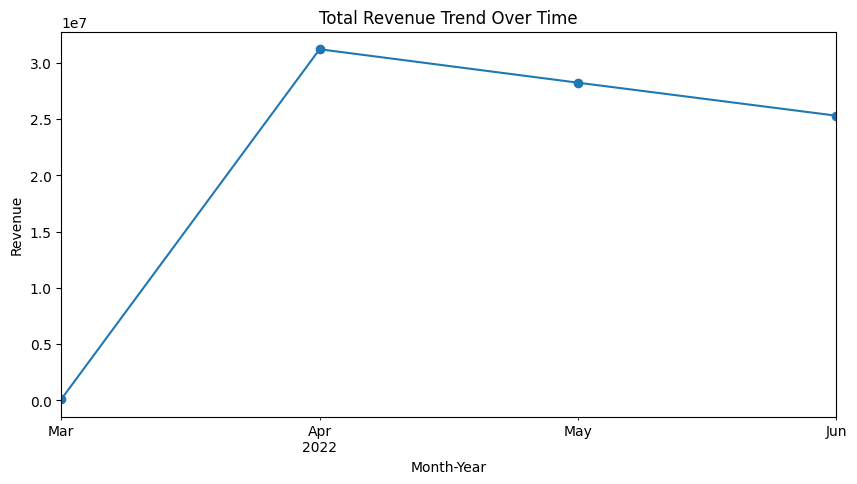

In [595]:
import matplotlib.pyplot as plt

df['year_month'] = df['date'].dt.to_period('M')
revenue_trend = df.groupby('year_month')['amount'].sum()

revenue_trend.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Total Revenue Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Revenue")
plt.show()


Best Selling Products

category
Set              41839972.67
Kurta            23791929.70
Western Dress    11851217.69
Top               5739724.30
Ethnic Dress       851318.66
Blouse             500082.18
Bottom             170571.98
Saree              130153.76
Dupatta               915.00
Name: amount, dtype: float64


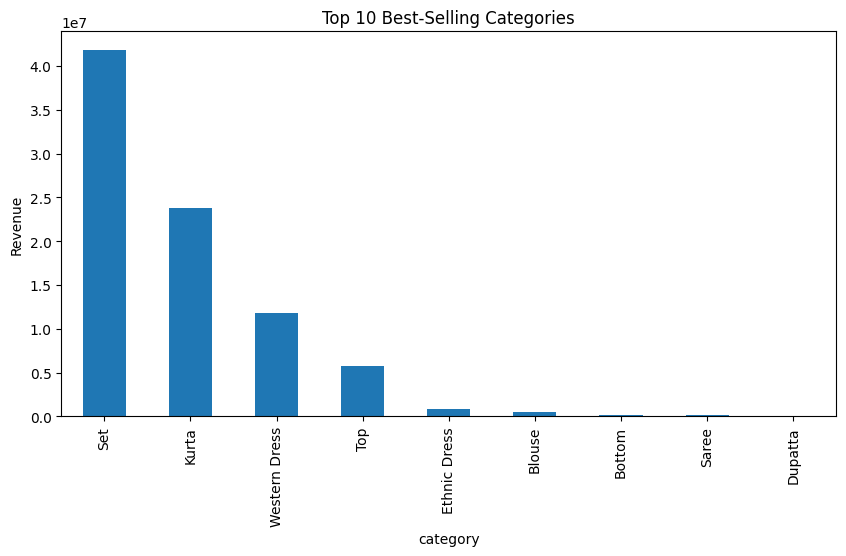

In [596]:
category_sales = df.groupby('category')['amount'].sum().sort_values(ascending=False).head(10)
print(category_sales)

category_sales.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Best-Selling Categories")
plt.ylabel("Revenue")
plt.show()

In [597]:
best_selling = df.groupby('category')['qty'].sum().sort_values(ascending=False)
print(best_selling.head(10))

category
Set              45286
Kurta            45048
Western Dress    13943
Top               9902
Ethnic Dress      1052
Blouse             864
Bottom             398
Saree              152
Dupatta              3
Name: qty, dtype: int64


date
3      107281.85
4    31215583.96
5    28242857.75
6    25310162.38
Name: amount, dtype: float64


<Axes: title={'center': 'Monthly Sales Trends'}, xlabel='Month', ylabel='Revenue'>

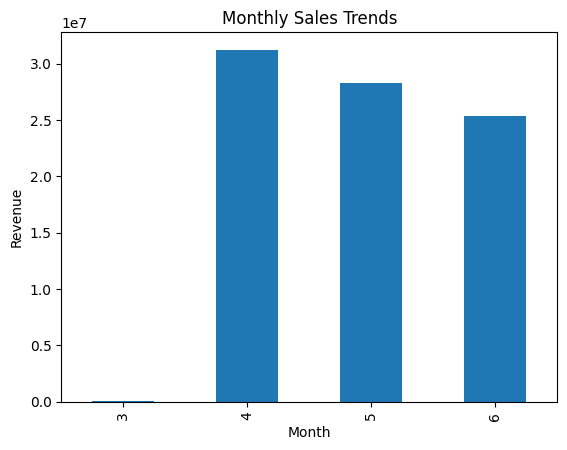

In [598]:
monthly_sales = df.groupby(df['date'].dt.month)['amount'].sum()
print(monthly_sales)

monthly_sales.plot(kind='bar', title='Monthly Sales Trends', xlabel='Month', ylabel='Revenue')

Average Order Value

In [599]:
total_revenue = df['amount'].sum()
total_orders = df['order_id'].nunique()
aov = total_revenue / total_orders

print("Average Order Value (AOV):", round(aov,2))

Average Order Value (AOV): 705.23


**Customer Insights Analysis**

Top Performing locations by Sale

ship_state
Maharashtra       14340579.14
Karnataka         11262277.37
Telangana          7448379.65
Uttar Pradesh      7392339.08
Tamil Nadu         7043248.11
Delhi              4754154.41
Kerala             4148691.58
West Bengal        3833575.44
Andhra Pradesh     3491101.72
Haryana            3085722.99
Name: amount, dtype: float64


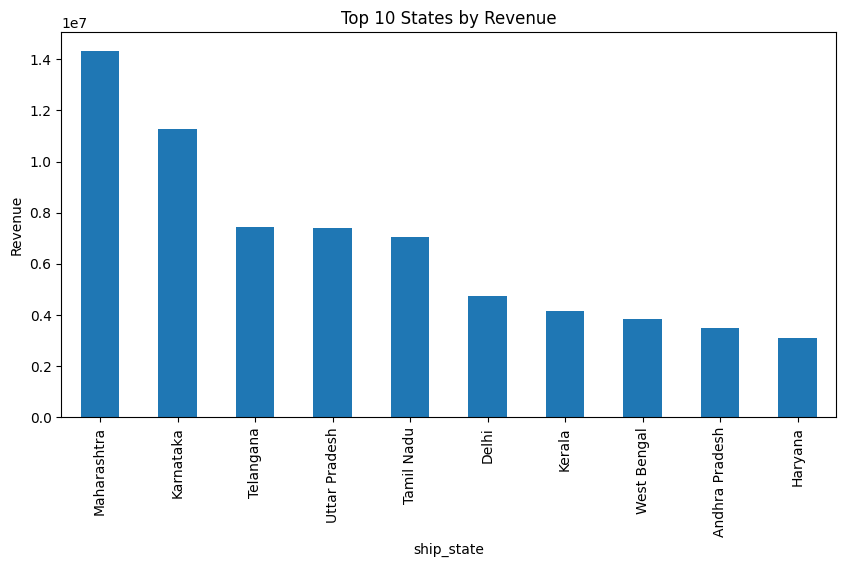

In [600]:
state_sales = df.groupby('ship_state')['amount'].sum().sort_values(ascending=False).head(10)
print(state_sales)

state_sales.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 States by Revenue")
plt.ylabel("Revenue")
plt.show()

In [601]:
top_cities = df.groupby('ship_city')['amount'].sum().sort_values(ascending=False)
print(top_cities.head(10))

ship_city
Bengaluru    7759011.80
Hyderabad    6017138.35
Mumbai       4584744.16
New Delhi    4279112.20
Chennai      3870165.94
Pune         3000312.79
Kolkata      1818264.99
Gurugram     1364896.78
Thane        1203562.35
Lucknow      1140795.10
Name: amount, dtype: float64


Cancellation Rate

In [602]:
cancelled_orders = df[df['courier_status']=="Cancelled"]['order_id'].nunique()
cancellation_rate = (cancelled_orders / total_orders) * 100

print("Cancellation Rate: ", round(cancellation_rate,2), "%")

Cancellation Rate:  4.71 %


B2B vs B2C Revenue

b2b
False    84267249.15
True       608636.79
Name: amount, dtype: float64


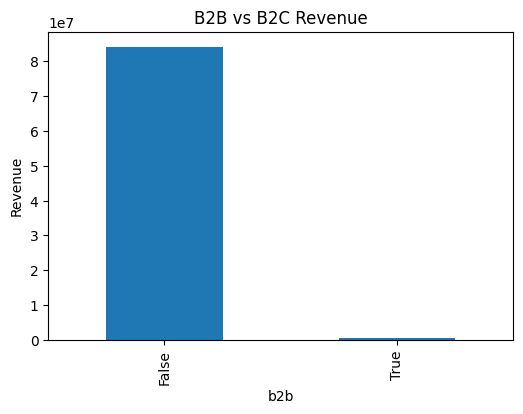

In [603]:
b2b_sales = df.groupby('b2b')['amount'].sum()
print(b2b_sales)

b2b_sales.plot(kind='bar', figsize=(6,4))
plt.title("B2B vs B2C Revenue")
plt.ylabel("Revenue")
plt.show()

**Logistics and Fulfilment optimization**

Fulfilment Comparsion

fulfilment
Amazon      59022822.00
Merchant    25853063.94
Name: amount, dtype: float64


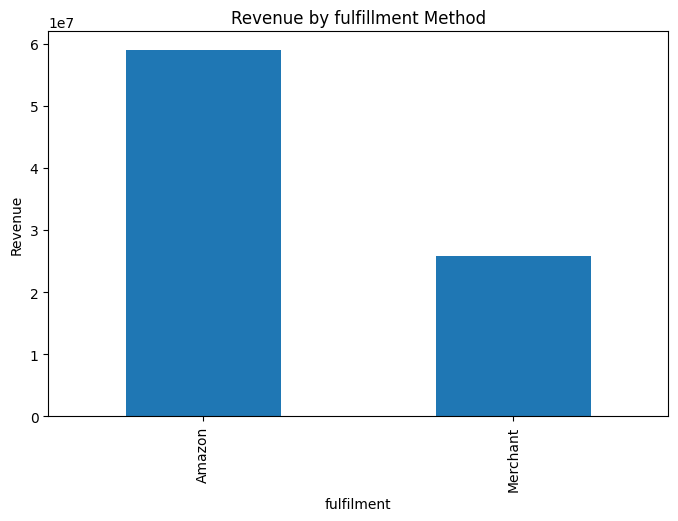

In [604]:
fulfillment_sales = df.groupby('fulfilment')['amount'].sum().sort_values(ascending=False)
print(fulfillment_sales)

fulfillment_sales.plot(kind='bar', figsize=(8,5))
plt.title("Revenue by fulfillment Method")
plt.ylabel("Revenue")
plt.show()

Status Distribution

status
Shipped             77772
Delivered           28771
Cancelled           18338
Returned             2098
Picked Up             973
Pending               939
Out for Delivery       35
Rejected               11
Lost                    5
Damaged                 1
Name: count, dtype: int64


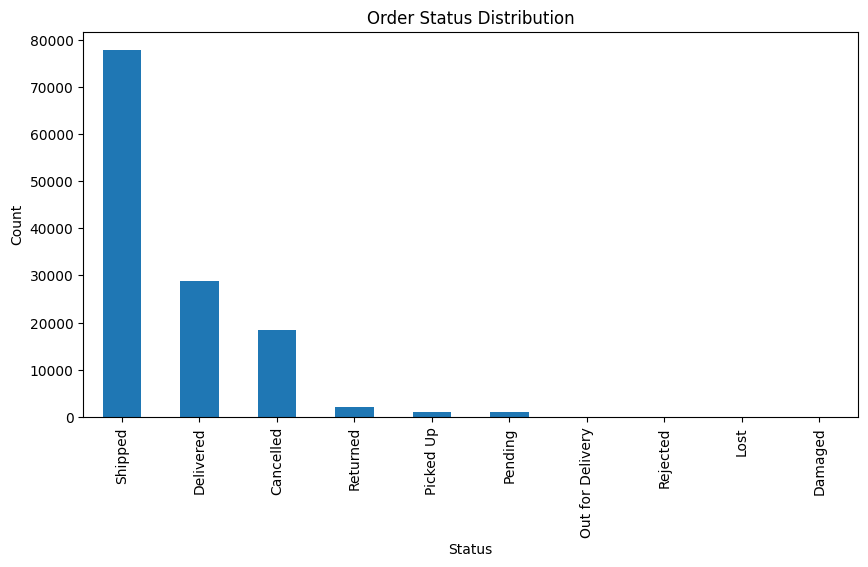

In [605]:
status_counts = df['status'].value_counts()
print(status_counts)

status_counts.plot(kind='bar', figsize=(10,5))
plt.title("Order Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

**Product & Inventory optimization**

High Demand product Categories

In [606]:
top_categories = df.groupby('category')['qty'].sum().sort_values(ascending=False)
print(top_categories.head(10))

category
Set              45286
Kurta            45048
Western Dress    13943
Top               9902
Ethnic Dress      1052
Blouse             864
Bottom             398
Saree              152
Dupatta              3
Name: qty, dtype: int64


Average Quantity Ordered

In [607]:
avg_quantity = df['qty'].mean()
avg_quantity_rounded = round(avg_quantity)
print("Average Quantity Ordered per Product:", avg_quantity_rounded)

Average Quantity Ordered per Product: 1


**Customer Satisfaction & Returns Analysis**

High Returns and cancellation rate

In [608]:
returns = df[df['status'].isin(['Cancelled','Returned'])]
returns_by_style = returns.groupby('style')['qty'].sum().sort_values(ascending=False)
print(returns_by_style.head(10))

style
JNE3797    220
JNE3405    152
SET268     133
J0230      117
J0003      106
J0341       98
SET324      90
JNE3440     88
SET345      81
JNE3399     77
Name: qty, dtype: int64


In [609]:
return_rate = returns.groupby('category')['qty'].sum() /df.groupby('category')['qty'].sum() * 100
print(return_rate.sort_values(ascending=False))

category
Set              6.856424
Top              6.776409
Kurta            6.719499
Western Dress    6.246862
Ethnic Dress     5.133080
Blouse           5.092593
Bottom           5.025126
Saree            3.947368
Dupatta               NaN
Name: qty, dtype: float64


Problematic products

In [610]:
problem_orders = df[df['status'].isin(['Cancelled','Returned','Refunded'])]

problem_products = problem_orders.groupby('style')['qty'].sum().sort_values(ascending=False)
print("Top 10 Problematic Products (by qty):")
print(problem_products.head(10))

problem_categories = problem_orders.groupby('category')['qty'].sum().sort_values(ascending=False)
print("Top 10 Problematic Categories (by qty):")
print(problem_categories.head(10))

Top 10 Problematic Products (by qty):
style
JNE3797    220
JNE3405    152
SET268     133
J0230      117
J0003      106
J0341       98
SET324      90
JNE3440     88
SET345      81
JNE3399     77
Name: qty, dtype: int64
Top 10 Problematic Categories (by qty):
category
Set              3105
Kurta            3027
Western Dress     871
Top               671
Ethnic Dress       54
Blouse             44
Bottom             20
Saree               6
Name: qty, dtype: int64


In [611]:

june_orders = df[df['date'].dt.month == 6]


total_revenue_june = june_orders['amount'].sum()

print("Total Revenue Generated in June:", round(total_revenue_june, 2))

Total Revenue Generated in June: 25310162.38


In [612]:
m_set_orders = df[(df['size'] == 'M') & (df['category'] == 'Set')]

total_qty_m_set = m_set_orders['qty'].sum()

print("Total Quantity Sold in Size M from Set:", total_qty_m_set)

Total Quantity Sold in Size M from Set: 8357


In [613]:
cancelled_orders = df[df['status'] == 'Cancelled']

total_cancelled = len(cancelled_orders)
print("Total Cancelled Orders:", total_cancelled)

Total Cancelled Orders: 18338


In [614]:
sales_by_date = df.groupby('date')['amount'].sum()

max_sales_date = sales_by_date.idxmax()
max_sales_value = sales_by_date.max()

print("Date with Highest Sales:", max_sales_date)
print("Sales Amount on that Date:", round(max_sales_value, 2))

Date with Highest Sales: 2022-05-04 00:00:00
Sales Amount on that Date: 1315726.17


In [615]:
may_orders = df[df['date'].dt.month == 5]

total_revenue_may = may_orders['amount'].sum()

print("Total Revenue in May:", round(total_revenue_may, 2))

Total Revenue in May: 28242857.75


In [616]:
sales_by_city = df.groupby('ship_city')['amount'].sum().sort_values(ascending=False)

second_city = sales_by_city.index[1]
second_city_sales = sales_by_city.iloc[1]

print("City with 2nd Highest Sales:", second_city)
print("Sales Amount:", round(second_city_sales, 2))

City with 2nd Highest Sales: Hyderabad
Sales Amount: 6017138.35


In [617]:
cancel_rate_by_month = (
    df.groupby(df['date'].dt.month)
    .apply(lambda x: (x[x['courier_status']=='Cancelled'].shape[0] / x.shape[0]) * 100)
)

print(cancel_rate_by_month)

date
3    5.263158
4    4.596787
5    4.460887
6    4.755334
dtype: float64


In [618]:
df.to_csv('sales_dataset_cleaned.csv', index=False)